# Scripting manual warps

Manual (Gaussian-kernel-based) warps can be scripted using the **warp_manual** function, which accepts four parameters:

* **y** --- original 1D data
* **center** --- warp kernel center, relative to its feasible range (between 0 and 1)
* **amp** --- warp kernel amplitude, relative to its feasible range (between -1 and 1)
* **head** --- warp kernel head width, relative to its feasible range (between 0 and 1)
* **tail** --- warp kernel tail width, relative to its feasible range (between 0 and 1)

In [1]:
%matplotlib inline

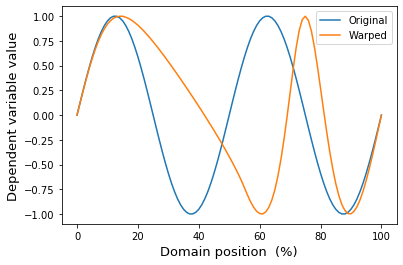

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import mwarp1d

#define warp:
center = 0.25
amp    = 0.5
head   = 0.2
tail   = 0.2

#apply warp:
Q      = 101  #domain size
y      = np.sin( np.linspace(0, 4*np.pi, Q) )  #an arbitary 1D observation
yw     = mwarp1d.warp_manual(y, center, amp, head, tail) #warped 1D observation

#plot:
plt.figure()
ax = plt.axes()
ax.plot(y, label='Original')
ax.plot(yw, label='Warped')
ax.legend()
ax.set_xlabel('Domain position  (%)', size=13)
ax.set_ylabel('Dependent variable value', size=13)
plt.show()

The same can be achieved somewhat more verbosely using the **ManualWarp1D** class:

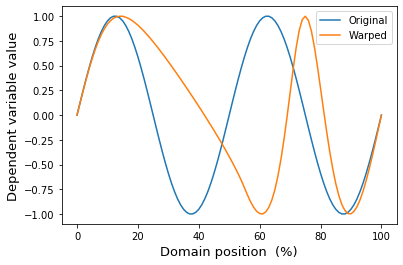

In [3]:
#create warp:
Q    = 101                      #domain size
warp = mwarp1d.ManualWarp1D(Q)  #constrained Gaussian kernel warp object
warp.set_center(0.25)           #relative warp center (0 to 1)
warp.set_amp(0.5)               #relative warp amplitude (-1 to 1)
warp.set_head(0.2)              #relative warp head (0 to 1)
warp.set_tail(0.2)              #relative warp tail (0 to 1)

#apply warp:
y    = np.sin( np.linspace(0, 4*np.pi, Q) )  #an arbitary 1D observation
yw   = warp.apply_warp(y)                    #warped 1D observation

#plot:
plt.figure()
ax = plt.axes()
ax.plot(y, label='Original')
ax.plot(yw, label='Warped')
ax.legend()
ax.set_xlabel('Domain position  (%)', size=13)
ax.set_ylabel('Dependent variable value', size=13)
plt.show()

One advantage of using the **ManualWarp1D** class is that it can be used to access details like the displacement field:

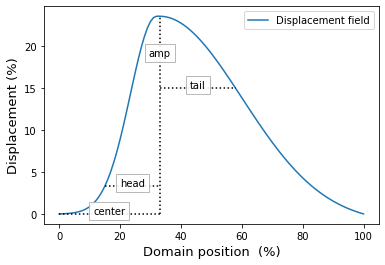

In [4]:
dq   = warp.get_displacement_field()


plt.figure()
ax = plt.axes()
ax.plot(dq, label='Displacement field')

#label the warp parameters:
c = warp.center
ax.plot([0,c], [0,0], color='k', ls=':')
ax.plot([c]*2, [0,dq.max()], color='k', ls=':')
xh,xt = 15,58
ax.plot([xh,c], [dq[xh]]*2, color='k', ls=':')
ax.plot([c,xt], [dq[xt]]*2, color='k', ls=':')

#add text labels
bbox = dict(facecolor='w', edgecolor='0.7', alpha=0.9)
ax.text(0.5*c, 0, 'center', ha='center', bbox=bbox)
ax.text(c, 0.8*dq.max(), 'amp', ha='center', bbox=bbox)
ax.text(0.5*(xh+c), dq[xh], 'head', ha='center', bbox=bbox)
ax.text(c + 0.5*(xt-c), dq[xt], 'tail', ha='center', bbox=bbox)

ax.legend()
ax.set_xlabel('Domain position  (%)', size=13)
ax.set_ylabel('Displacement (%)', size=13)
plt.show()

Note that the parameters above characterize this displacement field:

* **center** indicates the position of the kernel's maximum value
* **amp** indicates the kernel amplitude
* **head** and **tail** indicate the kernel width

Changing head and tail to zero, for example, yields the following result:

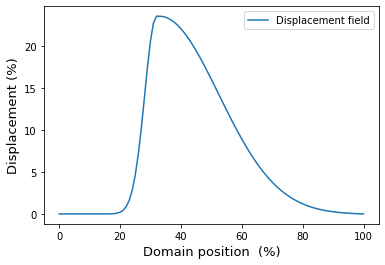

In [5]:
warp.set_head(0)
warp.set_tail(0)
dq   = warp.get_displacement_field()

plt.figure()
ax = plt.axes()
ax.plot(dq, label='Displacement field')
ax.legend()
ax.set_xlabel('Domain position  (%)', size=13)
ax.set_ylabel('Displacement (%)', size=13)
plt.show()

Note that these values of *head* and *tail* represent the minimum possible values for these parameters that maintain a monotonically increasing warped domain, which can be visualized as indicated below.

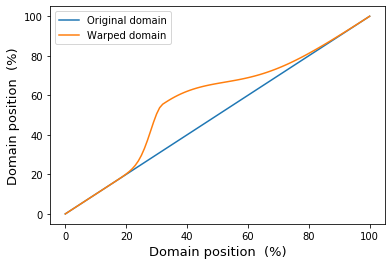

In [6]:
q0 = warp.get_original_domain()
qw = warp.get_warped_domain()

plt.figure()
ax = plt.axes()
ax.plot(q0, label='Original domain')
ax.plot(qw, label='Warped domain')
ax.legend()
ax.set_xlabel('Domain position  (%)', size=13)
ax.set_ylabel('Domain position  (%)', size=13)
plt.show()

Attempting to set smaller *absolute* values for *head* and *tail* would result in a non-monotonically increasing warping field. If the domain is time, it would imply that warped time does not flow forward across the whole domain, and thus that temporal events can be re-ordered in time.  The **ManualWarp1D** class ensures that this does not happen, and that all warped domains remain monotonically increasing. 